In [63]:

%load_ext autoreload
%autoreload 2

import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
periods, ppp, itraj = 20, 1000, 0

In [21]:
histories={}
for k in range(1,9):
    #hist_A, hist_loss, hist_grads
    histories[k] = load_train_results(periods=periods, ppp=ppp, train_id=k)

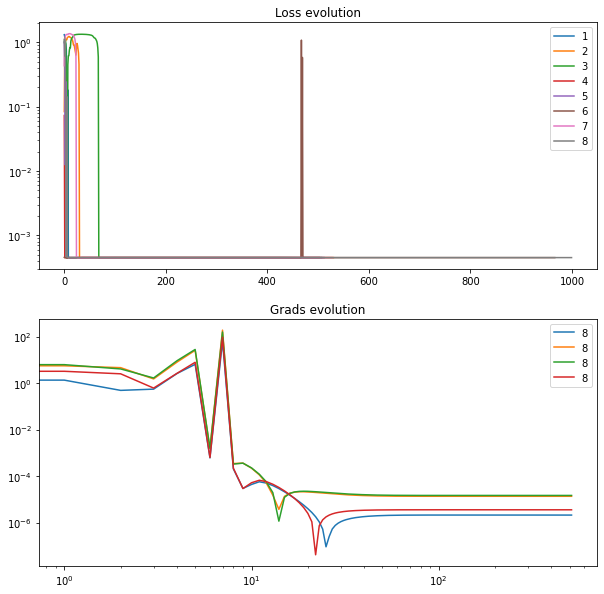

In [66]:
fig_size=(10,10)
fig = plt.figure(figsize=fig_size)

fig = display_histories(fig,histories)


In [33]:
for k in range(1,9):
    print(histories[k][0][-1], "\n")

[[-0.07486825  0.02797836]
 [-0.03777792 -0.06126405]] 

[[-0.04359882 -0.05777881]
 [-0.00787006 -0.06735848]] 

[[-0.1578885  -0.01538624]
 [-0.02094438 -0.07989437]] 

[[-0.06259016  0.05742301]
 [-0.04189194 -0.09878369]] 

[[-0.11244964  0.04438607]
 [-0.00792898 -0.05730991]] 

[[-0.2452942   0.14358097]
 [-0.14403099 -0.2230347 ]] 

[[-0.0730499   0.08813271]
 [-0.00821368 -0.09899869]] 

[[-0.10814754 -0.03608733]
 [-0.01645    -0.07479738]] 

